# Gustavo Cristiano Pessoa de Souza | RM: 551924

## Linear Regression

Link dataset: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [171]:
dados = pd.read_csv('cardata.csv')
dados

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [172]:
x = np.array(np.arange(1, 11)).reshape(-1, 1)
y = np.array(dados['Selling_Price'].head(10)).reshape(-1, 1)

y

array([[3.35],
       [4.75],
       [7.25],
       [2.85],
       [4.6 ],
       [9.25],
       [6.75],
       [6.5 ],
       [8.75],
       [7.45]])

# Escolha do carro a ser treinado

In [173]:
carro = dados[dados['Car_Name'] == 'city']
carro

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
251,city,2013,5.00,9.90,56701,Petrol,Dealer,Manual,0
253,city,2014,7.20,9.90,48000,Diesel,Dealer,Manual,0
254,city,2013,5.25,9.90,54242,Petrol,Dealer,Manual,0
256,city,2016,10.25,13.60,49562,Petrol,Dealer,Manual,0
257,city,2015,8.50,13.60,40324,Petrol,Dealer,Manual,0
258,city,2015,8.40,13.60,25000,Petrol,Dealer,Manual,0
260,city,2016,9.15,13.60,29223,Petrol,Dealer,Manual,0
267,city,2016,8.35,9.40,19434,Diesel,Dealer,Manual,0
269,city,2015,6.70,10.00,18828,Petrol,Dealer,Manual,0
270,city,2011,4.10,10.00,69341,Petrol,Dealer,Manual,0


In [174]:
qtd = carro.shape[0]
qtd

26

In [175]:
year = np.array(carro['Year'])
year

array([2013, 2014, 2013, 2016, 2015, 2015, 2016, 2016, 2015, 2011, 2009,
       2015, 2016, 2015, 2015, 2014, 2006, 2014, 2016, 2015, 2016, 2010,
       2015, 2016, 2009, 2017], dtype=int64)

In [176]:
selling_price = np.array(carro['Selling_Price'])
selling_price

array([ 5.  ,  7.2 ,  5.25, 10.25,  8.5 ,  8.4 ,  9.15,  8.35,  6.7 ,
        4.1 ,  3.  ,  7.5 , 10.9 ,  8.65,  9.7 ,  6.25,  2.1 ,  8.25,
        8.99,  8.4 , 10.11,  3.25,  8.55,  9.5 ,  3.35, 11.5 ])

In [177]:
x = year.reshape(-1, 1)
y = selling_price.reshape(-1, 1)

y

array([[ 5.  ],
       [ 7.2 ],
       [ 5.25],
       [10.25],
       [ 8.5 ],
       [ 8.4 ],
       [ 9.15],
       [ 8.35],
       [ 6.7 ],
       [ 4.1 ],
       [ 3.  ],
       [ 7.5 ],
       [10.9 ],
       [ 8.65],
       [ 9.7 ],
       [ 6.25],
       [ 2.1 ],
       [ 8.25],
       [ 8.99],
       [ 8.4 ],
       [10.11],
       [ 3.25],
       [ 8.55],
       [ 9.5 ],
       [ 3.35],
       [11.5 ]])

# Preço médio dos Honda City's

In [178]:
media = carro['Selling_Price'].mean()
media
round(media,2)

7.42

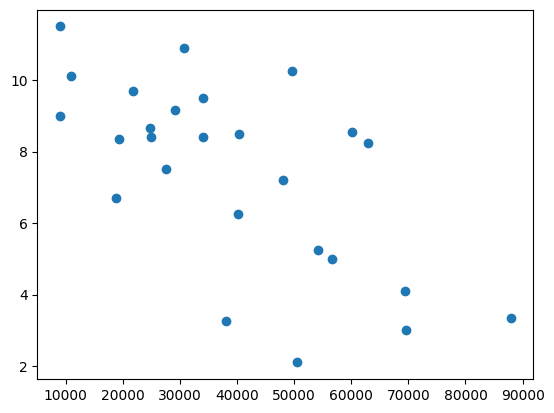

In [179]:
plt.scatter(carro['Kms_Driven'], carro['Selling_Price'])
plt.show()

# Valor dos carros diante seu ano (Mais recente, mais caro)

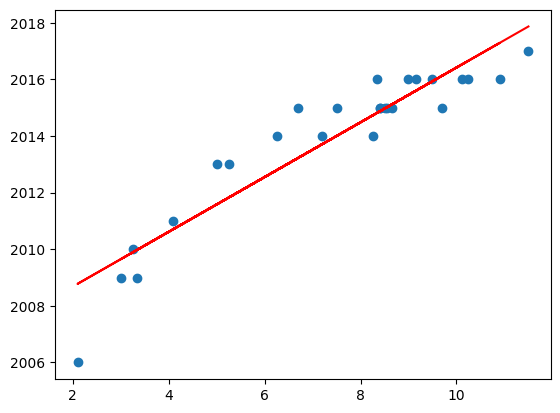

In [180]:
reg = linear_model.LinearRegression()
reg.fit(carro['Selling_Price'].values.reshape(-1,1), carro['Year'])
reg.coef_
reg.intercept_

plt.scatter(carro['Selling_Price'], carro['Year'])
x = np.array(carro['Selling_Price'])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()

# Valor de carro diante a sua quilometragem (mais baixa, mais caro)

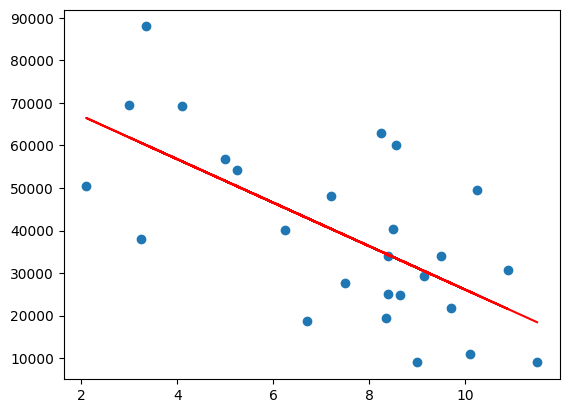

In [181]:
reg = linear_model.LinearRegression()
reg.fit(carro['Selling_Price'].values.reshape(-1,1), carro['Kms_Driven'])
reg.coef_
reg.intercept_

plt.scatter(carro['Selling_Price'], carro['Kms_Driven'])
x = np.array(carro['Selling_Price'])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()

# Predict dos valores pela KM

### Caso queira comprar um carro de 9 Mil dólares, quantos KM rodados ele teria? ↓↓↓

In [182]:
reg.predict([[5]])

array([51647.2207103])

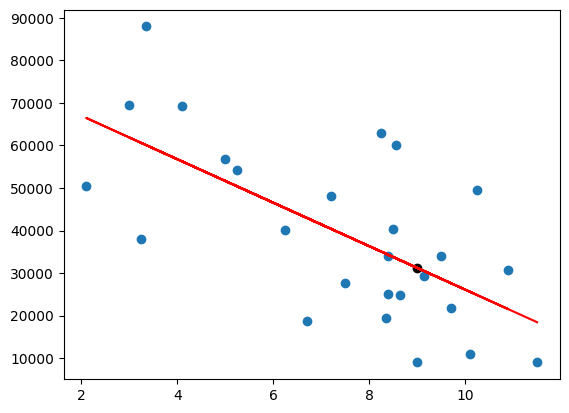

In [183]:
plt.scatter(carro['Selling_Price'], carro['Kms_Driven'])
plt.scatter(9, reg.predict([[9]])[0], color='k')
x = np.array(carro['Selling_Price'])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()